=== Bayesian Decision Theory (Gaussian) ===
Accuracy: 0.933
Confusion Matrix:
 [[42  0]
 [ 3  0]]


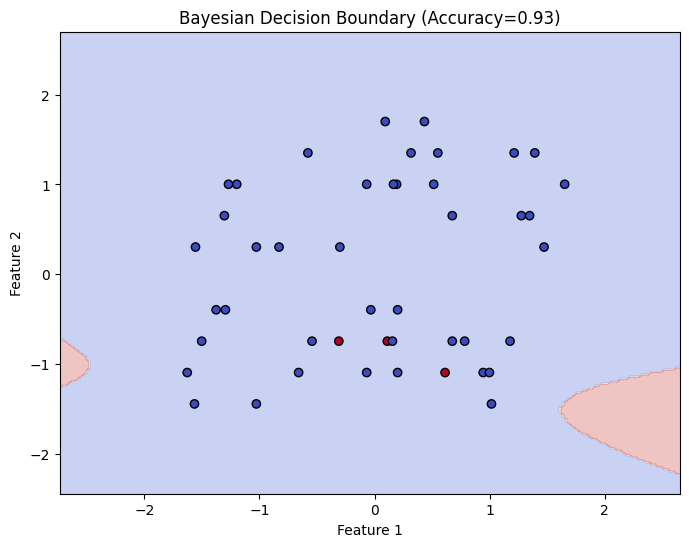

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# ---- Simple Gaussian Bayes Classifier ----
class BayesClassifier:
    def fit(self, X, y):
        self.cls = np.unique(y)
        self.priors = {c: np.mean(y==c) for c in self.cls}
        self.means = {c: X[y==c].mean(0) for c in self.cls}
        self.covs  = {c: np.cov(X[y==c], rowvar=False) for c in self.cls}
        return self
    def _posterior(self, x, c):
        m, S = self.means[c], self.covs[c]
        inv, det = np.linalg.inv(S), np.linalg.det(S)
        return -0.5*(np.log(det)+(x-m)@inv@(x-m)) + np.log(self.priors[c])
    def predict(self, X):
        return np.array([max(self.cls, key=lambda c:self._posterior(x,c)) for x in X])

# ---- Load dataset ----
df = pd.read_csv("spam_emails_dataset.csv")
label = 'spam' if 'spam' in df.columns else df.columns[-1]
X, y = df.iloc[:, :2].values, pd.factorize(df[label])[0]   # using first 2 features for visualization
X = StandardScaler().fit_transform(X)

# ---- Split data ----
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=0)

# ---- Train & Predict ----
model = BayesClassifier().fit(Xtr, ytr)
ypred = model.predict(Xte)

# ---- Evaluation ----
acc = accuracy_score(yte, ypred)
cm = confusion_matrix(yte, ypred)

print("=== Bayesian Decision Theory (Gaussian) ===")
print(f"Accuracy: {acc:.3f}")
print("Confusion Matrix:\n", cm)

# ---- Visualization ----
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1,X[:,0].max()+1,200),
                     np.linspace(X[:,1].min()-1,X[:,1].max()+1,200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(Xte[:,0], Xte[:,1], c=yte, edgecolor='k', cmap='coolwarm')
plt.title(f"Bayesian Decision Boundary (Accuracy={acc:.2f})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
